In [4]:
#GROUP 4 
#015002 ANUKSHA JAIN
#015005 AYUSHI GUPTA
#015015 ANIKET NANDY
#015025 BISWADEEP DAS
#015045 SIDDHARTH GUPTA


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
train=pd.read_csv(r"/content/sample_data/train.csv.zip")

In [7]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [8]:
train.shape

(137, 43)

In [9]:
#Knowing general information about our file

In [10]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [11]:
#checking null values
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [12]:
#checking rows and columns 
train.shape

(137, 43)

In [13]:
#The ID column is irrelevant so we will drop them.
train=train.drop(['Id'],axis=1)
train

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [14]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
train

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [15]:
#Extracting month and year 
train['month']=[x.month for x in train['Open Date']]
train['year']=[x.year for x in train['Open Date']]


In [16]:
#Dropping date column
train=train.drop(['Open Date'],axis=1)
train

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


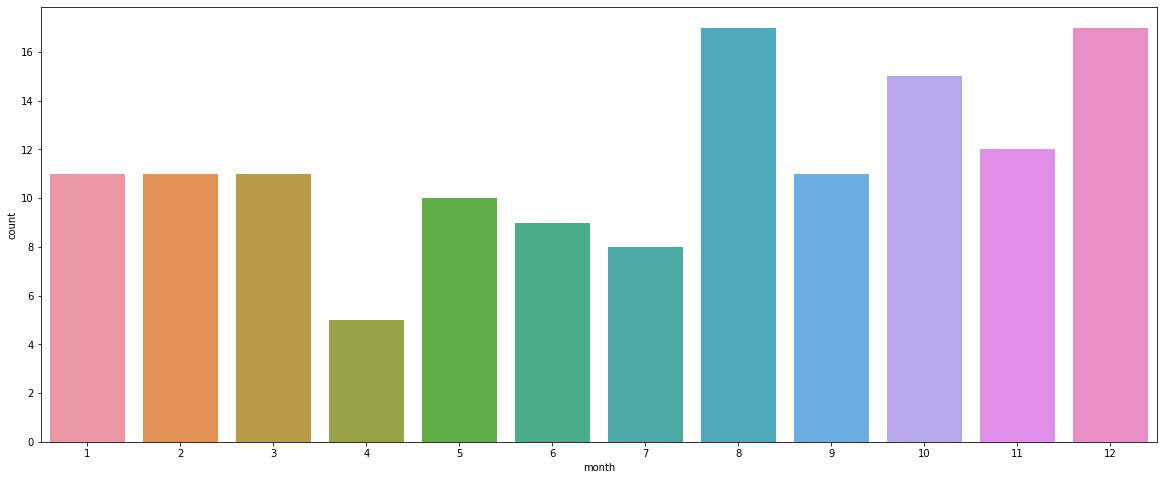

In [17]:
#knowing about the ocurences of month-for which month we have the maximum data
plt.figure(figsize=(20,8))
sns.countplot(train['month'])


In [18]:
#occurence of various months in the dataset. 
#Most data for the last 5 months. The highest of them is from August and December. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


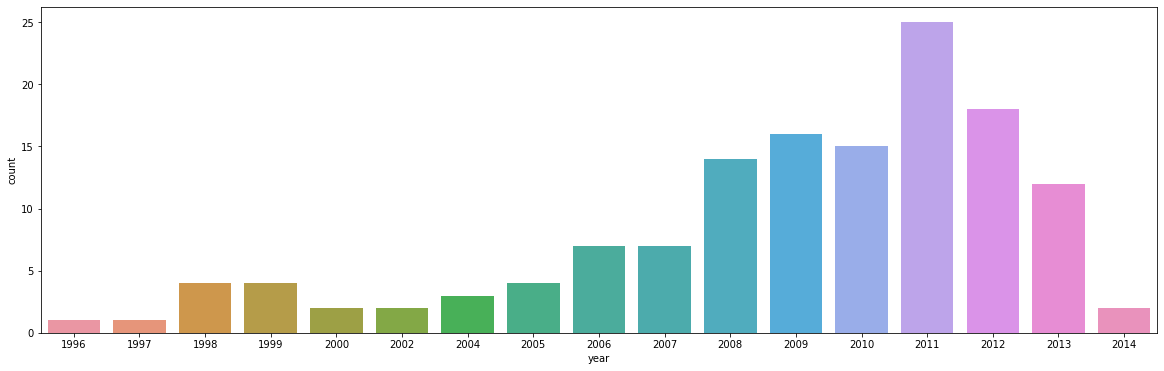

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(train['year'])

In [20]:
#occurence of various years in the dataset. 
#Most data for the restras which opened in 2008-13. The highest of them is from 2011. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'revenue')]

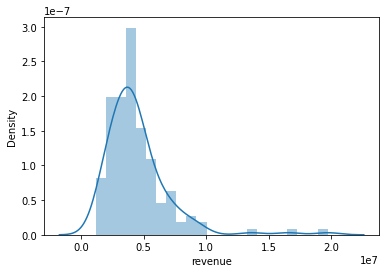

In [21]:
#check the distribution and outliers
sns.distplot(a=train['revenue'], kde=True).set(xlabel='revenue')
#rightly skewed distribution with three outliers

In [22]:
train[train['revenue'] > 10000000 ]

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
16,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,19696939.0,1,2000
75,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,3,4,4,5,3,4.0,0,0,0,0,0,5,5,5,5,4,0,0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,16549064.0,10,2005
99,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,4,4,4,5,3,4.0,5,5,5,5,5,5,5,5,3,1,5,5,5.0,1.0,5.0,1.0,5,5,4,2,5,5,5,3,13575224.0,12,1999


In [23]:
# Drop outliers
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=True).head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009


In [24]:
#which month has highest revenue
train.groupby('month')['revenue'].mean()

month
1     4.521243e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    4.428821e+06
11    4.721400e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [25]:
#september had most revenue.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


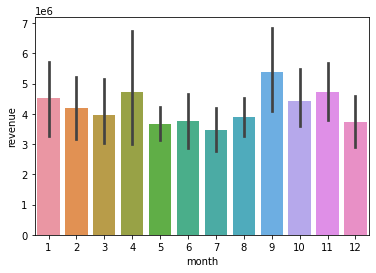

In [26]:
#visulaizing the samee
sns.barplot('month','revenue',data=train)

In [27]:
#which year has highest revenue
train.groupby('year')['revenue'].mean()

year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2002    4.991022e+06
2004    3.482435e+06
2005    3.298470e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [28]:
#highest revenue in year 2000.

In [29]:
#Exploring categorical variables

In [30]:
train['Type'].value_counts()


FC    74
IL    59
DT     1
Name: Type, dtype: int64

In [31]:
types={'FC':0,'IL':1,'DT':2}
train['Type'] = train['Type'].map(types)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


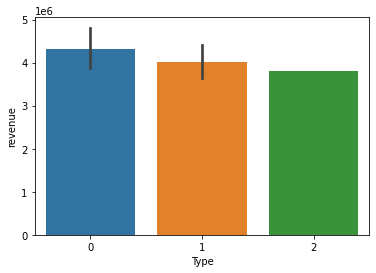

In [32]:
#barplot for various type of restrauants with their revenue
sns.barplot(x='Type', y='revenue', data=train )

In [33]:
train['City Group'].value_counts()

Big Cities    75
Other         59
Name: City Group, dtype: int64

In [34]:
cities={'Big Cities':0,'Other':1}
train['City Group'] = train['City Group'].map(cities)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [35]:
#barplot for city groups with their revenue

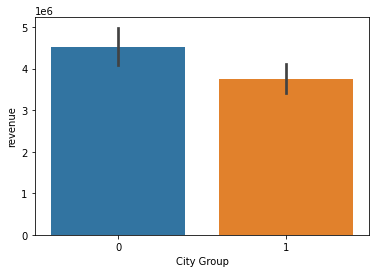

In [36]:
sns.barplot(x='City Group', y='revenue', data=train )

In [37]:
#Revenue of every city
#Edirne highest revenue

In [38]:
train.groupby('City')['revenue'].mean()

City
Adana             4.894944e+06
Afyonkarahisar    4.952497e+06
Amasya            2.954086e+06
Ankara            3.275406e+06
Antalya           3.481448e+06
Aydın             3.429798e+06
Balıkesir         4.758476e+06
Bolu              4.263629e+06
Bursa             4.092295e+06
Denizli           2.344689e+06
Diyarbakır        3.735351e+06
Edirne            5.444227e+06
Elazığ            5.525735e+06
Eskişehir         3.957953e+06
Gaziantep         4.316715e+06
Isparta           4.015749e+06
Karabük           3.807496e+06
Kastamonu         3.273041e+06
Kayseri           4.567576e+06
Kocaeli           3.745135e+06
Konya             2.667256e+06
Kütahya           2.993069e+06
Kırklareli        1.619683e+06
Muğla             4.111129e+06
Osmaniye          3.376145e+06
Sakarya           3.328853e+06
Samsun            3.247870e+06
Tekirdağ          3.312471e+06
Tokat             2.675511e+06
Trabzon           5.284100e+06
Uşak              1.763231e+06
İstanbul          4.873816e+06
İzm

In [39]:
a=train['City'].value_counts()

In [40]:
b=a.index

In [41]:
c={}
for i,j in enumerate(b):
  c.update({j:i})
  print(c)

{'İstanbul': 0}
{'İstanbul': 0, 'Ankara': 1}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6, 'Adana': 7}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6, 'Adana': 7, 'Diyarbakır': 8}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6, 'Adana': 7, 'Diyarbakır': 8, 'Kayseri': 9}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6, 'Adana': 7, 'Diyarbakır': 8, 'Kayseri': 9, 'Eskişehir': 10}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Samsun': 3, 'Bursa': 4, 'Sakarya': 5, 'Antalya': 6, 'Adana

In [42]:
train['City'] = train['City'].map(c)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,8,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,25,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,27,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,14,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,2,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,9,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,0,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [43]:
#co-relation matrix


In [44]:
corr_m=train.corr()

In [45]:
corr_m

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
City,1.000000,0.727653,-0.010597,-0.185199,-0.386394,-0.034876,-0.052517,0.144020,-0.344421,-0.126328,-0.054565,0.039146,0.064298,0.022965,0.069224,0.095854,-0.065259,-0.042853,-0.057862,-0.089522,-0.031709,0.085464,-0.091550,0.048318,-0.310485,0.058291,-0.169273,-0.111729,-0.160578,-0.097500,-0.225493,0.025585,-0.023230,-0.118210,-0.096295,-0.023950,-0.037272,-0.018605,-0.046687,-0.002711,-0.152625,0.068020,0.197831
City Group,0.727653,1.000000,-0.142432,-0.261099,-0.417732,-0.089034,-0.176806,0.013845,-0.412403,-0.198472,-0.089085,-0.030556,-0.014816,-0.110723,0.009217,0.019471,-0.133501,-0.128648,-0.145102,-0.181636,-0.136039,-0.058781,-0.165595,-0.037549,-0.252583,-0.012654,-0.239693,-0.212058,-0.230715,-0.189481,-0.296379,0.010997,-0.128248,-0.208894,-0.176055,-0.112986,-0.121480,-0.131852,-0.140891,-0.092677,-0.211989,0.035446,0.148095
Type,-0.010597,-0.142432,1.000000,0.154457,0.113421,0.065811,0.088882,0.108837,0.166424,0.129602,0.114548,0.152873,0.150725,0.071766,0.101636,0.142905,0.512171,0.595392,0.564051,0.517945,0.595120,0.168103,0.229007,0.217370,0.111316,0.203951,0.581777,0.575000,0.569586,0.553313,0.084816,0.086448,0.512715,0.567166,0.499070,0.665372,0.493669,0.607474,0.543897,0.598853,-0.086699,-0.064590,-0.102868
P1,-0.185199,-0.261099,0.154457,1.000000,0.838885,0.697242,0.677659,0.305929,0.751361,0.854802,0.768868,0.771484,0.802385,0.544021,0.719129,0.718246,0.496221,0.478780,0.548135,0.420110,0.481665,0.802808,0.821144,0.659508,0.390750,0.702550,0.431191,0.479238,0.510524,0.281614,0.845818,0.602571,0.489174,0.482017,0.554168,0.331468,0.572795,0.451969,0.557497,0.279780,0.106975,-0.001502,-0.091001
P2,-0.386394,-0.417732,0.113421,0.838885,1.000000,0.477588,0.542889,0.206367,0.672183,0.773089,0.517153,0.490201,0.509847,0.441297,0.440902,0.426072,0.368678,0.362366,0.399737,0.335361,0.351536,0.599735,0.669678,0.524876,0.483501,0.518695,0.357930,0.382192,0.413326,0.199927,0.734997,0.341442,0.345122,0.356576,0.392851,0.238867,0.397430,0.317964,0.391217,0.163148,0.217491,-0.070989,-0.161109
P3,-0.034876,-0.089034,0.065811,0.697242,0.477588,1.000000,0.444878,0.167547,0.575940,0.651155,0.689844,0.742174,0.765035,0.424741,0.686257,0.699650,0.398149,0.384499,0.473787,0.335543,0.427536,0.649276,0.683344,0.573255,0.254767,0.602103,0.343192,0.365250,0.397961,0.255365,0.649976,0.575409,0.473406,0.408655,0.463065,0.312008,0.502304,0.430524,0.486365,0.285903,0.011755,0.034556,-0.028092
P4,-0.052517,-0.176806,0.088882,0.677659,0.542889,0.444878,1.000000,0.722733,0.600422,0.702271,0.663350,0.681072,0.691444,0.588317,0.604731,0.579217,0.356234,0.296360,0.385864,0.246350,0.365937,0.726961,0.580437,0.550528,0.066732,0.558196,0.222021,0.296252,0.296764,0.110904,0.644160,0.466466,0.391640,0.339514,0.444401,0.186663,0.438623,0.283505,0.416991,0.183612,0.057928,0.051029,0.011922
P5,0.144020,0.013845,0.108837,0.305929,0.206367,0.167547,0.722733,1.000000,0.330282,0.446302,0.444993,0.464162,0.461755,0.444594,0.407117,0.379748,0.076955,0.041712,0.162675,0.036466,0.191475,0.512155,0.345066,0.357127,-0.189883,0.356427,0.016779,0.039401,0.049605,0.004940,0.330666,0.302336,0.242189,0.110058,0.213551,0.067390,0.241310,0.171040,0.191596,0.030025,0.002373,-0.008815,0.115942
P6,-0.344421,-0.412403,0.166424,0.751361,0.672183,0.575940,0.600422,0.330282,1.000000,0.742725,0.735742,0.686652,0.669755,0.433543,0.652707,0.578147,0.428310,0.433793,0.527346,0.387355,0.460484,0.536734,0.666835,0.432641,0.211746,0.492507,0.469735,0.494401,0.531994,0.341148,0.734705,0.588499,0.466110,0.483874,0.525052,0.307028,0.525265,0.419852,0.530788,0.333469,0.125315,-0.049115,-0.175689
P7,-0.126328,-0.198472,0.129602,0.854802,0.773089,0.651155,0.702271,0.446302,0.742725,1.000000,0.754158,0.776570,0.778310,0.509609,0.737741,0.706808,0.461669,0.434540,0.532563,0.372991,0.499692,0.759033,0.79423

In [46]:
corr_m['revenue'].sort_values(ascending=False).head(10)
#none shows strong postive correlation

revenue    1.000000
P2         0.217491
P28        0.190908
P6         0.125315
P23        0.114357
P1         0.106975
P7         0.102491
P19        0.083804
P17        0.081541
P21        0.061999
Name: revenue, dtype: float64

In [47]:
corr_m['revenue'].sort_values(ascending=False).tail(10)
#none shows strong negative correlation

P31          -0.028761
P36          -0.038126
P35          -0.038330
P32          -0.050743
P30          -0.055073
P34          -0.068246
Type         -0.086699
City         -0.152625
year         -0.202740
City Group   -0.211989
Name: revenue, dtype: float64

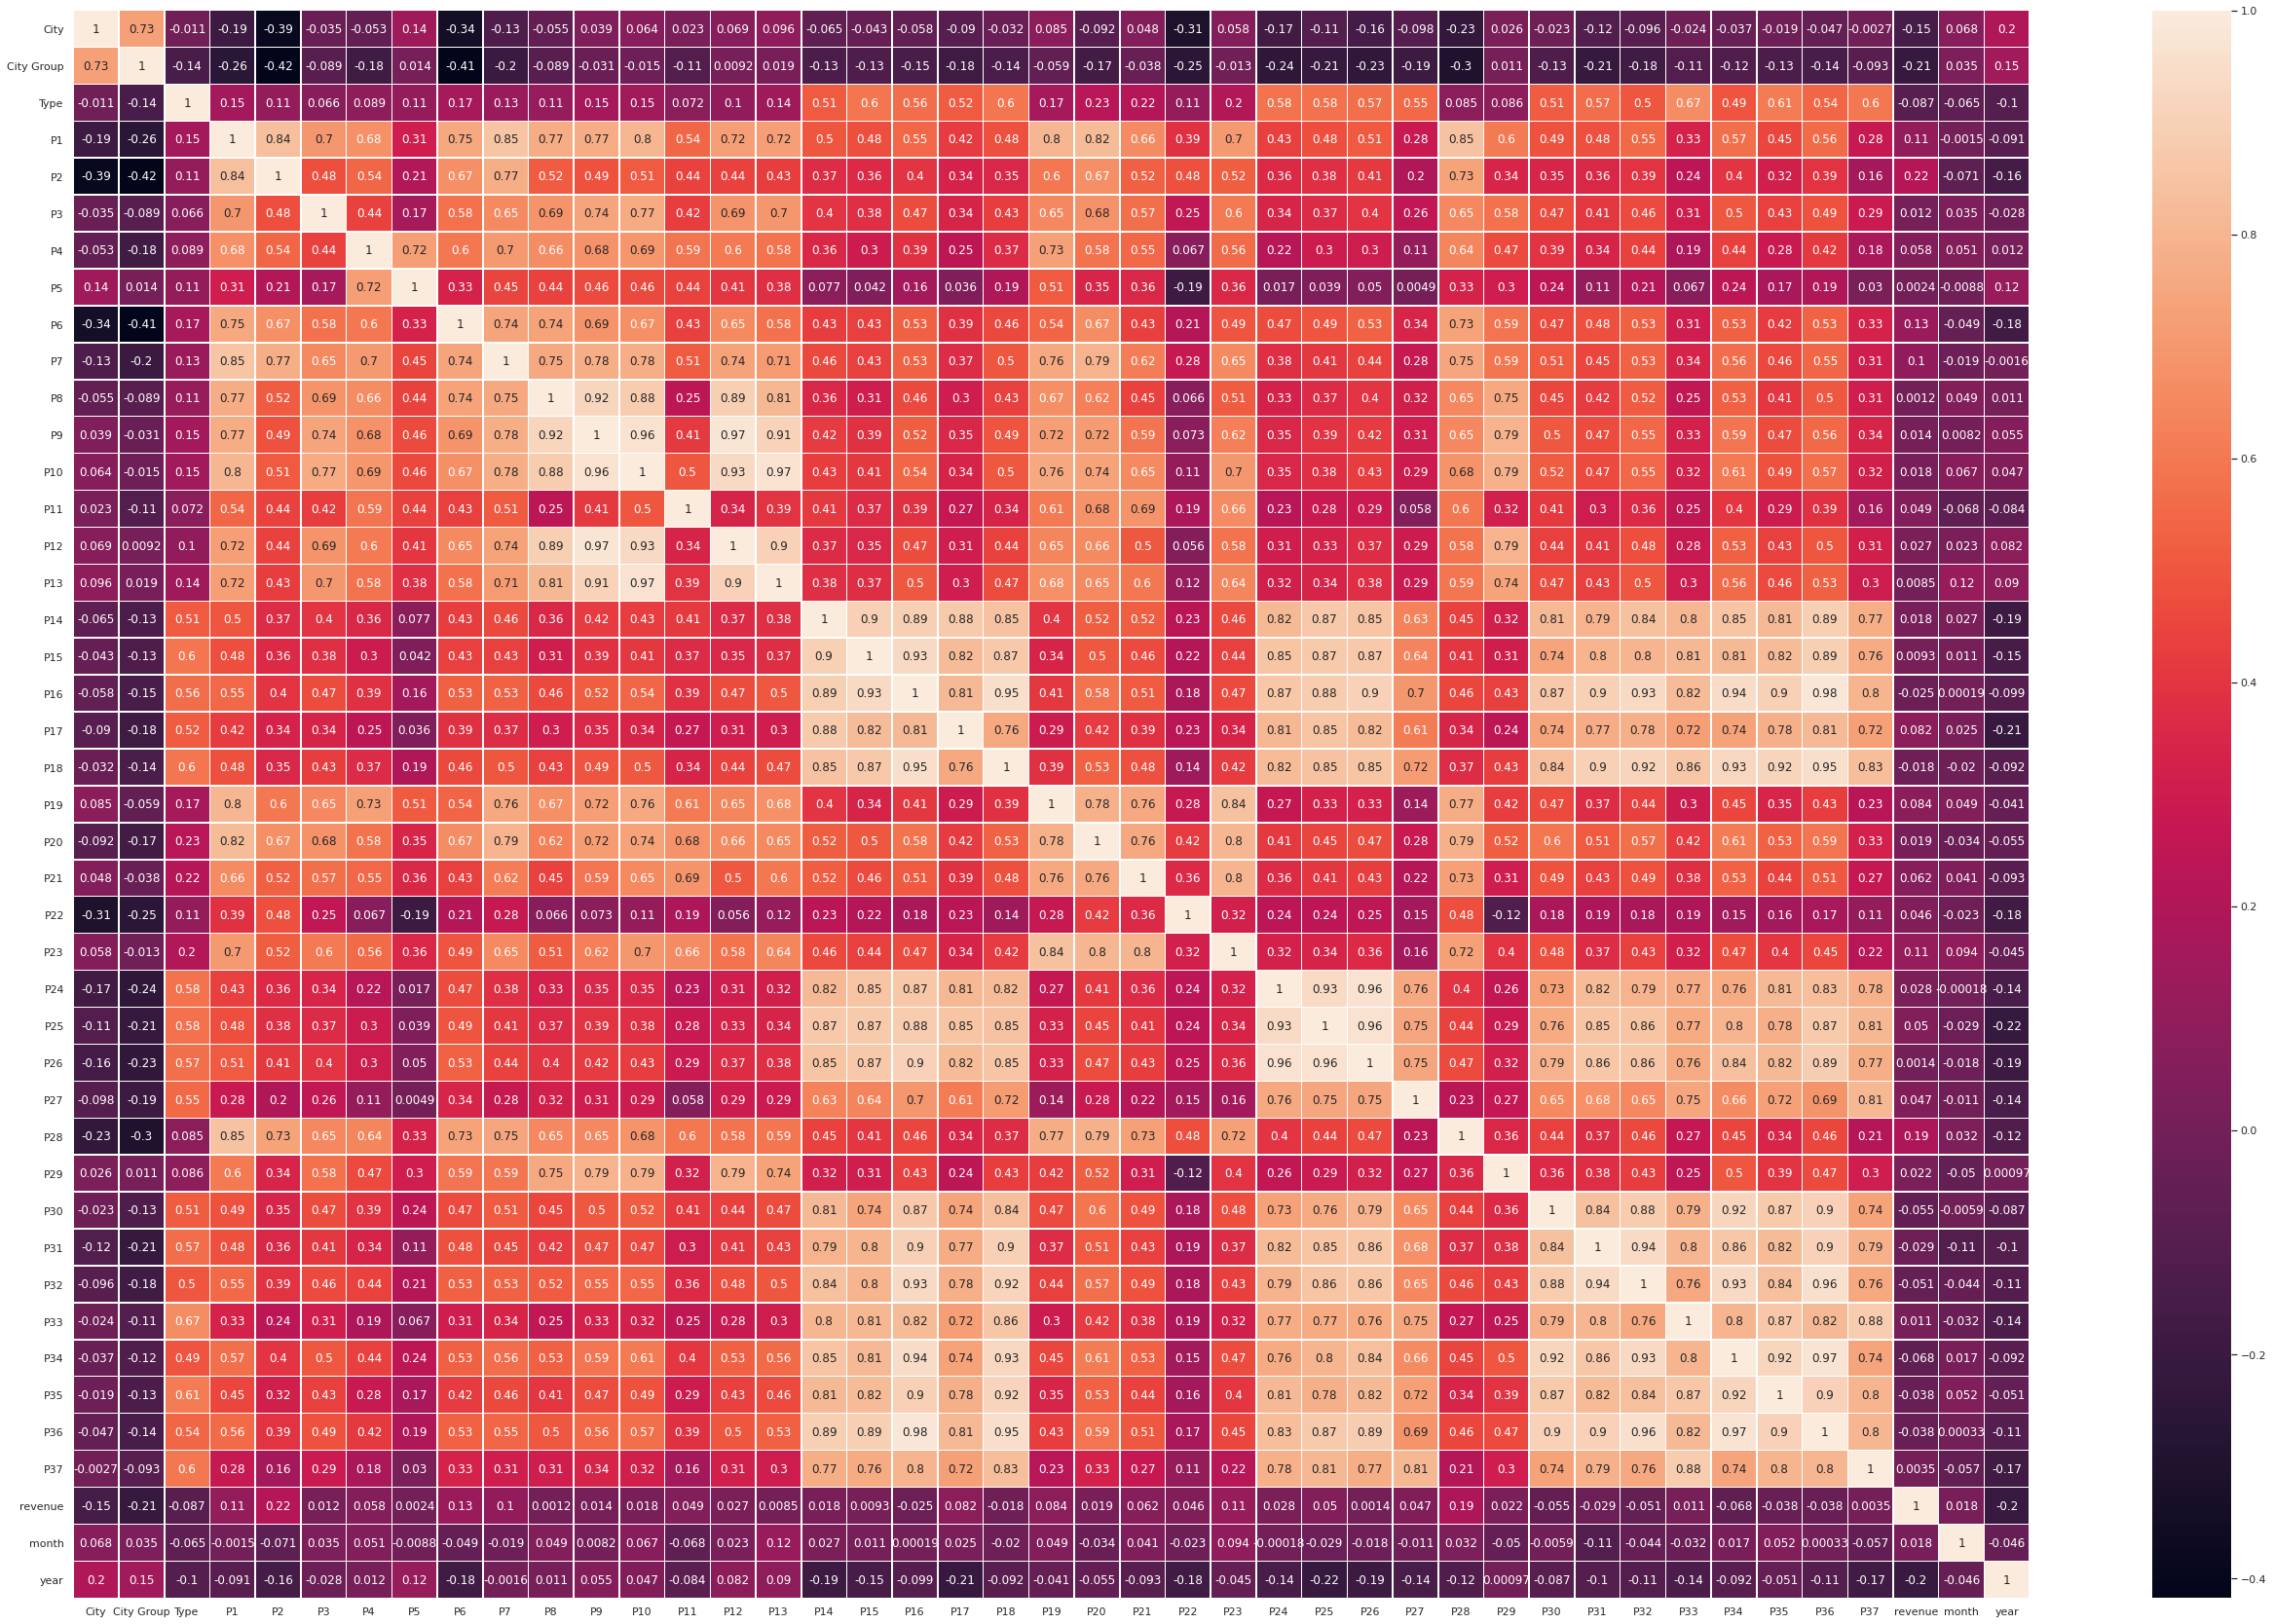

In [48]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(45,30)) 
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix,annot=True,linewidths=.5,ax=ax)

In [49]:
train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,8,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,25,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,27,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009


In [50]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
x=train.drop('revenue',axis=1)
y=train['revenue']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(107, 42)
(107,)
(27, 42)
(27,)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [53]:
dtr = DecisionTreeRegressor() #create the object of the model
dtr=dtr.fit(X_train,y_train)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
pred = dtr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 2098854.407407407
The MsE with the DT regressor is: 6945594297955.593
The R2_Score with the DT regressor is: -0.5323797750218553


In [56]:
knn=KNeighborsRegressor()
knn=knn.fit(X_train,y_train)

In [57]:
pred = knn.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the KNN regressor is: "+str(s))
print("The MsE with the KNN regressor is: "+str(s1))
print("The R2_Score with the KNN regressor is: "+str(s2))

The MAE with the KNN regressor is: 2030610.4222222224
The MsE with the KNN regressor is: 5293242233149.746
The R2_Score with the KNN regressor is: -0.1678276896705162


In [58]:
r = RandomForestRegressor() #create the object of the model
r=r.fit(X_train,y_train)

In [59]:
pred = r.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 1805515.4196296295
The MsE with the RF regressor is: 4627922293460.826
The R2_Score with the RF regressor is: -0.02104070849049622


In [60]:
#hypertuning to find best parameters

In [61]:
parameters = {'max_depth':  list(range(6, 30, 10)),
              'max_leaf_nodes': list(range(50, 500, 100)),
              'n_estimators': list(range(50, 1001, 150))}

from sklearn.model_selection import GridSearchCV

gsearch = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = parameters, 
                       scoring='neg_mean_squared_error',
                       n_jobs=4,cv=5,verbose=7)

gsearch.fit(x, y)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   49.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 525 out of 525 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [62]:
print(gsearch.best_params_.get('n_estimators'))
print(gsearch.best_params_.get('max_leaf_nodes'))
print(gsearch.best_params_.get('max_depth'))

50
450
16


In [63]:
final_model = RandomForestRegressor(
                         max_depth = gsearch.best_params_.get('max_depth'),
                           max_leaf_nodes = gsearch.best_params_.get('max_leaf_nodes'),
    n_estimators = gsearch.best_params_.get('n_estimators'),random_state=1, n_jobs=4)
final_model.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=450,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=4, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [64]:
pred = final_model.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 618877.0809259258
The MsE with the RF regressor is: 698114368198.7584
The R2_Score with the RF regressor is: 0.8459777101010892
